Preprocess the job data and extract the job requirement part.

In [ ]:
import pandas as pd

In [ ]:
job_df = pd.read_csv('glass_door_1122.csv')
job_df.head()

,source,job_title,company_name,company_score,job_details,salary,location,url,company_url,job_category
0,https://www.glassdoor.com/,Data Scientist,Walmart,3.3,Position Summary...\nWhat you'll do...\nData S...,$106K - $155K (Glassdoor est.),"Sunnyvale, CA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist
1,https://www.glassdoor.com/,Data Scientist,Takeda Pharmaceutical,4.0,"By clicking the “Apply” button, I understand t...",$102K - $145K,"Lexington, MA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist
2,https://www.glassdoor.com/,Data Scientist/Biostatistician,Scismic,3.1,Scismic is supporting the growth of a biotech ...,$94K - $134K (Glassdoor est.),"Palo Alto, CA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist
3,https://www.glassdoor.com/,Data Scientist,National Security Agency,3.5,Data science at the National Security Agency (...,$75K - $176K,"Fort Meade, MD",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist
4,https://www.glassdoor.com/,"Data Scientist, Marketing & Online (Remote)",The Home Depot,3.8,Position Purpose:\nThe Data Scientist is respo...,$90K - $160K,"Atlanta, GA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

job_counter = sorted(Counter(job_df['job_title']).items(),key=lambda x:x[1],reverse=True)
# job_counter
jobs = [x[0] for x in job_counter[:20]]
jobs_count = [x[1] for x in job_counter[:20]]

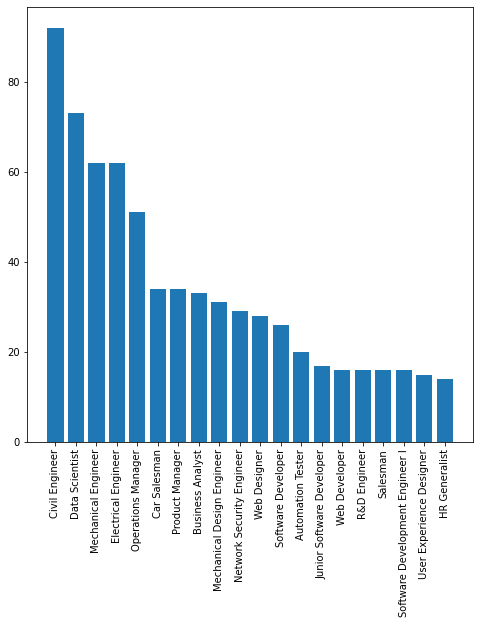

In [ ]:
plt.subplots(figsize=(8,8))
plt.bar(jobs, jobs_count)
plt.xticks(rotation=90)
plt.show()

In [ ]:
details_df = job_df['job_details']
details_df.head()

0    Position Summary...\nWhat you'll do...\nData S...
1    By clicking the “Apply” button, I understand t...
2    Scismic is supporting the growth of a biotech ...
3    Data science at the National Security Agency (...
4    Position Purpose:\nThe Data Scientist is respo...
Name: job_details, dtype: object

Try to use regular expression to extract jd

In [ ]:
job_df.iloc[40,:]['job_details']

'Data Scientist DER + Policy Forecasting\nHYBRID SCHEDULE\nWe also have aPrincipal Economist DER+Policy Forcasting opening\nEither MA or NY location OK 2 days in office 3 days home\nKey Accountabilities\nDevelop long-term forecasts for distributed resources (including solar PV, energy efficiency, demand response, EVs, storage, etc.), and create long-term outlooks for policy based decarbonization goals. Perform additional analysis relating to DERs, DSM, and decarbonization policies in the forecast as necessary.\nWork with the electric and gas forecasting teams to ensure the electric and gas load forecasts properly account for distributed energy resources and new technologies and policies.\nThe position of Senior Data Scientist requires the ability to work independently with minimal guidance and communicate to both internal and external stakeholders to present and defend results. The ability to speak to both technical and non-technical audiences to present projects is essential.\nUpdate 

1. duties
2. responsibilities
3. looking For
4. Required Experience
5. be responsible for
6. Requirements:
7. Qualifications and Requirements
8. Applicants/candidates MUST have
9. Qualifications(more important)
10. skills
11. Requirements


In [ ]:
len(job_df)

4499

Use spacy to extract job types.

In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download en_core_web_sm

2022-11-24 06:39:40.065067: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 7.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
import en_core_web_sm

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
jd = ' '.join(job_df['job_details'][0].split('\n')).lower()
jd

"position summary... what you'll do... data scientist are you a hardcore numbers person who would enjoy solving some of business’ toughest challenges by illuminating phenomena and opportunity held within one of the world’s largest data sets? as a data scientist at walmart global tech, the mammoth scale and volume of our global data is virtually limitless. you will create insights that influence how we make decisions that have impact at an unprecedented scale. you will have the opportunity to do your best work while unlocking vast business opportunity by extracting key insights, using pattern recognition to develop predictive analytics, and translating results into goal-oriented business actions. each day, you will be presented with a variety of new challenges and interesting projects that tap your interests and strengths. this isn’t analyst work; you’ll be leveraging data science methods, including ai and machine learning in an incredibly dynamic and engaging environment. min requireme

In [ ]:
doc = nlp(jd)
for idx, sent in enumerate(doc.sents):
    print(f'[{idx:2d}] >', sent)
    if idx == 14:
        mysent = sent

[ 0] > position summary... what you'll do... data scientist are you a hardcore numbers person who would enjoy solving some of business’ toughest challenges by illuminating phenomena and opportunity held within one of the world’s largest data sets?
[ 1] > as a data scientist at walmart global tech, the mammoth scale and volume of our global data is virtually limitless.
[ 2] > you will create insights that influence how we make decisions that have impact at an unprecedented scale.
[ 3] > you will have the opportunity to do your best work while unlocking vast business opportunity by extracting key insights, using pattern recognition to develop predictive analytics, and translating results into goal-oriented business actions.
[ 4] > each day, you will be presented with a variety of new challenges and interesting projects that tap your interests and strengths.
[ 5] > this isn’t analyst work; you’ll be leveraging data science methods, including ai and machine learning in an incredibly dynami

In [ ]:
for w in mysent:
    print(f'{w.text:15s} [{w.tag_:5s} | {w.pos_:6s} | {spacy.explain(w.tag_)}]')

walmart         [NNP   | PROPN  | noun, proper singular]
started         [VBD   | VERB   | verb, past tense]
small           [JJ    | ADJ    | adjective (English), other noun-modifier (Chinese)]
,               [,     | PUNCT  | punctuation mark, comma]
with            [IN    | ADP    | conjunction, subordinating or preposition]
a               [DT    | DET    | determiner]
single          [JJ    | ADJ    | adjective (English), other noun-modifier (Chinese)]
discount        [NN    | NOUN   | noun, singular or mass]
store           [NN    | NOUN   | noun, singular or mass]
and             [CC    | CCONJ  | conjunction, coordinating]
the             [DT    | DET    | determiner]
simple          [JJ    | ADJ    | adjective (English), other noun-modifier (Chinese)]
philosophy      [NN    | NOUN   | noun, singular or mass]
of              [IN    | ADP    | conjunction, subordinating or preposition]
selling         [VBG   | VERB   | verb, gerund or present participle]
more            [JJR   

In [ ]:
from spacy.matcher import Matcher
import re
job_types = []
# use spacy to extract the job type
def get_job_type(jd):
  jd = ' '.join(str(jd).split('\n')).lower()
  doc = nlp(jd)
  patterns = [
      [{'LOWER': 'job', 'OP': '+'},
            {'LOWER': 'type', 'OP': '+'},
            {'IS_PUNCT': True, 'OP': '?'},
            {'POS': 'ADJ', 'OP': '+'},
            {'IS_PUNCT': True, 'OP': '?'},
            {'POS': 'NOUN', 'OP': '?'}]
      ]

  # Matcher class object 
  matcher = Matcher(nlp.vocab) 
  #matcher.add("matching_1", None, pattern) 
  matcher.add("matching_2", patterns) 

  matches = matcher(doc) # multiple matches
  if matches:
    first_match = matches[0]
    last_match = matches[-1]
    span = doc[first_match[1]:last_match[2]] 
  else:
    span = ''
  span = str(span)
  job_type = re.sub('job type: ','',span)
  job_type = job_type.split(' ')[0] # remove the other words after -time
  job_types.append(job_type)

In [ ]:
for jd in job_df['job_details']:
  get_job_type(jd)

In [ ]:
len(job_types)

4499

In [ ]:
job_df['work_type'] = job_types

In [ ]:
jd_requirements = []
for jd in job_df['job_details']:
  try:
    if jd.lower():
      jd_des = jd.lower()
      if 'requirements' in jd_des:
        jd_req = ''.join(jd_des.split('requirements')[1:])
      elif 'requirement' in jd_des:
        jd_req = ''.join(jd_des.split('requirement')[1:])
      elif 'qualifications' in jd_des:
        jd_req = ''.join(jd_des.split('qualifications')[1:])
      elif 'qualification' in jd_des:
        jd_req = ''.join(jd_des.split('qualification')[1:])  
      elif 'skills' in jd_des:
        jd_req = ''.join(jd_des.split('skills')[1:]) 
      elif 'skill' in jd_des:
        jd_req = ''.join(jd_des.split('skill')[1:]) 
      elif 'responsibilities' in jd_des:
        jd_req = ''.join(jd_des.split('responsibilities')[1:]) 
      elif 'responsibility' in jd_des:
        jd_req = ''.join(jd_des.split('responsibility')[1:]) 
      elif 'duties' in jd_des:
        jd_req = ''.join(jd_des.split('duties')[1:]) 
      elif 'duty' in jd_des:
        jd_req = ''.join(jd_des.split('duty')[1:]) 
      elif 'responsible for' in jd_des:
        jd_req = ''.join(jd_des.split('responsible for')[1:]) 
      elif 'must have' in jd_des:
        jd_req = ''.join(jd_des.split('must have')[1:]) 
      else:
        jd_req = ''
      jd_requirements.append(jd_req)
  except:
    jd_requirements.append('')

In [ ]:
len(jd_requirements)

4499

In [ ]:
job_df['job_requirement'] = jd_requirements

In [ ]:
job_df

,source,job_title,company_name,company_score,job_details,salary,location,url,company_url,job_category,work_type,job_requirement
0,https://www.glassdoor.com/,Data Scientist,Walmart,3.3,Position Summary...\nWhat you'll do...\nData S...,$106K - $155K (Glassdoor est.),"Sunnyvale, CA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,,": 7 years' experience in data science, machine..."
1,https://www.glassdoor.com/,Data Scientist,Takeda Pharmaceutical,4.0,"By clicking the “Apply” button, I understand t...",$102K - $145K,"Lexington, MA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,,":\nbachelors degree in data science, statistic..."
2,https://www.glassdoor.com/,Data Scientist/Biostatistician,Scismic,3.1,Scismic is supporting the growth of a biotech ...,$94K - $134K (Glassdoor est.),"Palo Alto, CA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,full-time,":\nphd in biomedical informatics, biostatistic..."
3,https://www.glassdoor.com/,Data Scientist,National Security Agency,3.5,Data science at the National Security Agency (...,$75K - $176K,"Fort Meade, MD",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,,- developing qualitative and quantitative met...
4,https://www.glassdoor.com/,"Data Scientist, Marketing & Online (Remote)",The Home Depot,3.8,Position Purpose:\nThe Data Scientist is respo...,$90K - $160K,"Atlanta, GA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,,:\nenvironment:\n1. located in a comfortable i...
...,...,...,...,...,...,...,...,...,...,...,...,...
4494,https://www.glassdoor.com/,eCommerce Product Manager,Lovehoney Group,3.3,The Lovehoney Group is one of the world's lead...,$77K - $113K (Glassdoor est.),"Austin, TX",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Product Manager,,are included in global site initiatives.\nown...
4495,https://www.glassdoor.com/,"Sr. Manager, Product Management- NMA (POTF)",Capital One,4.2,"Plano Town Center (31064), United States of Am...",NaN,"Plano, TX",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Product Manager,,of applicable laws regarding criminal backgro...
4496,https://www.glassdoor.com/,"Product Owner/Manager, Corporate Labor BI",American Red Cross,3.5,Why Choose Us?\nAs one of the nation’s premier...,NaN,Remote,https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Product Manager,full-time,".\nlead effort, in partnership with the tech l..."
4497,https://www.glassdoor.com/,Sr. Product Manager,Comcast,3.9,Comcast brings together the best in media and ...,$138K - $208K,"New York, NY",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Product Manager,,.\n\ncomcast is an eoe/veterans/disabled/lgbt ...


In [ ]:
job_df = job_df.fillna('')
job_df = job_df.drop_duplicates()
job_df

,source,job_title,company_name,company_score,job_details,salary,location,url,company_url,job_category,work_type,job_requirement
0,https://www.glassdoor.com/,Data Scientist,Walmart,3.3,Position Summary...\nWhat you'll do...\nData S...,$106K - $155K (Glassdoor est.),"Sunnyvale, CA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,,": 7 years' experience in data science, machine..."
1,https://www.glassdoor.com/,Data Scientist,Takeda Pharmaceutical,4.0,"By clicking the “Apply” button, I understand t...",$102K - $145K,"Lexington, MA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,,":\nbachelors degree in data science, statistic..."
2,https://www.glassdoor.com/,Data Scientist/Biostatistician,Scismic,3.1,Scismic is supporting the growth of a biotech ...,$94K - $134K (Glassdoor est.),"Palo Alto, CA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,full-time,":\nphd in biomedical informatics, biostatistic..."
3,https://www.glassdoor.com/,Data Scientist,National Security Agency,3.5,Data science at the National Security Agency (...,$75K - $176K,"Fort Meade, MD",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,,- developing qualitative and quantitative met...
4,https://www.glassdoor.com/,"Data Scientist, Marketing & Online (Remote)",The Home Depot,3.8,Position Purpose:\nThe Data Scientist is respo...,$90K - $160K,"Atlanta, GA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,,:\nenvironment:\n1. located in a comfortable i...
...,...,...,...,...,...,...,...,...,...,...,...,...
4494,https://www.glassdoor.com/,eCommerce Product Manager,Lovehoney Group,3.3,The Lovehoney Group is one of the world's lead...,$77K - $113K (Glassdoor est.),"Austin, TX",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Product Manager,,are included in global site initiatives.\nown...
4495,https://www.glassdoor.com/,"Sr. Manager, Product Management- NMA (POTF)",Capital One,4.2,"Plano Town Center (31064), United States of Am...",,"Plano, TX",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Product Manager,,of applicable laws regarding criminal backgro...
4496,https://www.glassdoor.com/,"Product Owner/Manager, Corporate Labor BI",American Red Cross,3.5,Why Choose Us?\nAs one of the nation’s premier...,,Remote,https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Product Manager,full-time,".\nlead effort, in partnership with the tech l..."
4497,https://www.glassdoor.com/,Sr. Product Manager,Comcast,3.9,Comcast brings together the best in media and ...,$138K - $208K,"New York, NY",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Product Manager,,.\n\ncomcast is an eoe/veterans/disabled/lgbt ...


In [ ]:
job_df.to_csv('glass_door_job_requirements.csv', encoding = 'utf-8-sig',index=False)

In [ ]:
job_df['job_requirement'][0]

' include:\nnegotiation / reduction of liens with providers and third-party payers at the resolution of injured party’s claim.\npreparing client disbursement agreements.\ncompiling and tabulating all associated client costs, medical bills, and fees.\nverifying existence of all outstanding liens and costs.\npreparing disbursement spreadsheet showing breakdown of attorney’s fees and costs, and client’s medical bills and total recovery.\npreparing checks for payment of bills.\nwe are looking for someone to join our team for the long term. the position offers a competitive salary, performance-based bonuses, paid time off, and plenty of opportunity to grow.\nplease submit a resume.\njob type: full-time\npay: $22.00 - $30.00 per hour\nbenefits:\n401(k)\nhealth insurance\npaid time off\nreferral program\nschedule:\n8 hour shift\nsupplemental pay types:\nbonus pay\ncommission pay\nability to commute/relocate:\nlos angeles, ca 90004: reliably commute or planning to relocate before starting work

In [ ]:
import os
# print(os.listdir())
file_list = os.listdir()
file_list

['.config',
 'job_positions_Washington.csv',
 'job_positions_NewYork.csv',
 'job_positions_Texas.csv',
 'glass_door_jobs.csv',
 'job_positions_Georgia.csv',
 'job_positions_Florida.csv',
 'job_positions_California.csv',
 'job_positions_Pennsylvania.csv',
 'job_positions_NewJersey.csv',
 'sample_data']

In [ ]:
# gb = job_df.groupby(['job_requirement']).count()
# gb
# s = 'fully uses all inspection gauges and instruments, including their set up, analysis and adjustment.\n4. calibrates measuring gauges and equipment as directed.\n5. may lead and assist other inspectors and make set ups for their use.\n6. moves parts and materials to and from work area.\n7. works closely with engineering, assembly/test and operations to resolve quality issues.\n8. must pass required eye tests, and will be subject to the random drug and alcohol testing program.\n9. required to follow company policies (safety , attendance etc)\n10. maintains a clean well organized work area.\n11. interacts with organizational team members and other departments in a professional manner.\n12. may be level i operator or level ii inspector in one or more liquid penetrant, ultra-sonic or eddy currents.\n13. may be nasa solder inspection certified.\n14. provides technical guidance to all other inspectors in inspection techniques and processes. responds professionally to questions from peers regarding inspection.\n15. demonstrated ability to resolve inspection issues without quality engineering or supervisory support.\njob type: full-time\nbenefits:\n401(k) matching\ndental insurance\nflexible spending account\nhealth insurance\nlife insurance\npaid time off\ntuition reimbursement\nvision insurance\nschedule:\n8 hour shift\nability to commute/relocate:\nspringfield, nj 07081: reliably commute or planning to relocate before starting work (required)\nexperience:\nmachining: 10 years (preferred)\nshift availability:\nday shift (preferred)\nwork location: one location\nshow less'
# urls_dup = list(job_df[job_df['job_requirement']==s]['url'])
# urls_dup

In [ ]:
job_df = pd.read_csv('glass_door_job_requirements.csv')
job_df.head()

,source,job_title,company_name,company_score,job_details,salary,location,url,company_url,job_category,work_type,job_requirement
0,https://www.glassdoor.com/,Data Scientist,Walmart,3.3,Position Summary...\nWhat you'll do...\nData S...,$106K - $155K (Glassdoor est.),"Sunnyvale, CA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,NaN,": 7 years' experience in data science, machine..."
1,https://www.glassdoor.com/,Data Scientist,Takeda Pharmaceutical,4.0,"By clicking the “Apply” button, I understand t...",$102K - $145K,"Lexington, MA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,NaN,":\nbachelors degree in data science, statistic..."
2,https://www.glassdoor.com/,Data Scientist/Biostatistician,Scismic,3.1,Scismic is supporting the growth of a biotech ...,$94K - $134K (Glassdoor est.),"Palo Alto, CA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,full-time,":\nphd in biomedical informatics, biostatistic..."
3,https://www.glassdoor.com/,Data Scientist,National Security Agency,3.5,Data science at the National Security Agency (...,$75K - $176K,"Fort Meade, MD",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,NaN,- developing qualitative and quantitative met...
4,https://www.glassdoor.com/,"Data Scientist, Marketing & Online (Remote)",The Home Depot,3.8,Position Purpose:\nThe Data Scientist is respo...,$90K - $160K,"Atlanta, GA",https://www.glassdoor.com/partner/jobListing.h...,https://www.glassdoor.com/Overview/Working-at-...,Data Scientist,NaN,:\nenvironment:\n1. located in a comfortable i...


In [ ]:
glassdoor_df = job_df[['job_title','company_name','location','job_details','job_requirement','salary','work_type','url','job_category','company_url']]
sources = ['glassdoor']*len(glassdoor_df)

job_cats = ['']*len(glassdoor_df)
glassdoor_df.insert(0, "source", sources)

# glassdoor_df.insert(5, "job_category", job_cats)
# glassdoor_df.head()

In [ ]:
glassdoor_df = glassdoor_df.fillna('')
glassdoor_df.head()

,source,job_title,company_name,location,job_details,job_requirement,salary,work_type,url,job_category,company_url
0,glassdoor,Data Scientist,Walmart,"Sunnyvale, CA",Position Summary...\nWhat you'll do...\nData S...,": 7 years' experience in data science, machine...",$106K - $155K (Glassdoor est.),,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
1,glassdoor,Data Scientist,Takeda Pharmaceutical,"Lexington, MA","By clicking the “Apply” button, I understand t...",":\nbachelors degree in data science, statistic...",$102K - $145K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
2,glassdoor,Data Scientist/Biostatistician,Scismic,"Palo Alto, CA",Scismic is supporting the growth of a biotech ...,":\nphd in biomedical informatics, biostatistic...",$94K - $134K (Glassdoor est.),full-time,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
3,glassdoor,Data Scientist,National Security Agency,"Fort Meade, MD",Data science at the National Security Agency (...,- developing qualitative and quantitative met...,$75K - $176K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
4,glassdoor,"Data Scientist, Marketing & Online (Remote)",The Home Depot,"Atlanta, GA",Position Purpose:\nThe Data Scientist is respo...,:\nenvironment:\n1. located in a comfortable i...,$90K - $160K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...


In [ ]:
# data_df = pd.read_csv(file_list[1])
# data_df.head()

In [ ]:
linkedin_df = pd.DataFrame()
for file in file_list:
  if 'job_positions' in file:
    data_df = pd.read_csv(file)
    linkedin_df = pd.concat([linkedin_df,data_df],ignore_index=True)

In [ ]:
# ['job_title','company_name','location','job_details','job_requirement','salary','work_type','url','job_category','company_url']

In [ ]:
linkedin_df = pd.read_csv('linkedin_jobs.csv')
linkedin_df.head()

,job_category,job_title,company_name,job_location,work_type,salary,requirement,job_description,url,company_url
0,Data Scientist,Data Scientist,ManTech,"Hanover, MD",Full-time,NaN,"[""bachelor's degree in a quantitative discipli...","\n \nSecure our Nation, Ignite your Fut...",https://www.linkedin.com/jobs/view/3363903657/...,https://www.linkedin.com/company/mantech?trk=p...
1,Data Scientist,Data Review Scientist II - CMB,Eurofins Lancaster Laboratories,"Lancaster, PA",Full-time,NaN,"['the ideal candidate would possess:', 'strong...",\n \nCompany Description\nEurofins Scie...,https://www.linkedin.com/jobs/view/3363499807/...,https://www.linkedin.com/company/lancaster-lab...
2,Data Scientist,"Principal Data Scientist (Remote) - Richmond, ...",Fidelity Investments,"Richmond, VA",Full-time,NaN,[],\n 2037687\nJob Description\nFidelity I...,https://www.linkedin.com/jobs/view/3353549780/...,https://www.linkedin.com/company/fidelity-inve...
3,Data Scientist,Comcast Cybersecurity: Data Scientist 5,Comcast,"Washington, DC",Full-time,"$133,117.31 - $199,675.96",['10 years +'],"\n R349592\nComcast’s Technology, Produ...",https://www.linkedin.com/jobs/view/3358732815/...,https://www.linkedin.com/company/comcast?trk=p...
4,Data Scientist,Data Scientist,Dice,United States,Contract,NaN,['nice to have skills technical skills aws//go...,\n Dice is the leading career destinati...,https://www.linkedin.com/jobs/view/3369999037/...,https://www.linkedin.com/company/dice?trk=publ...


In [ ]:
sources_linkedin = ['linkedin']*len(linkedin_df)
linkedin_df.insert(0, "source", sources_linkedin)

In [ ]:
linkedin_df.head()

,source,job_category,job_title,company_name,job_location,work_type,salary,requirement,job_description,url,company_url
0,linkedin,Data Scientist,Data Scientist,ManTech,"Hanover, MD",Full-time,NaN,"[""bachelor's degree in a quantitative discipli...","\n \nSecure our Nation, Ignite your Fut...",https://www.linkedin.com/jobs/view/3363903657/...,https://www.linkedin.com/company/mantech?trk=p...
1,linkedin,Data Scientist,Data Review Scientist II - CMB,Eurofins Lancaster Laboratories,"Lancaster, PA",Full-time,NaN,"['the ideal candidate would possess:', 'strong...",\n \nCompany Description\nEurofins Scie...,https://www.linkedin.com/jobs/view/3363499807/...,https://www.linkedin.com/company/lancaster-lab...
2,linkedin,Data Scientist,"Principal Data Scientist (Remote) - Richmond, ...",Fidelity Investments,"Richmond, VA",Full-time,NaN,[],\n 2037687\nJob Description\nFidelity I...,https://www.linkedin.com/jobs/view/3353549780/...,https://www.linkedin.com/company/fidelity-inve...
3,linkedin,Data Scientist,Comcast Cybersecurity: Data Scientist 5,Comcast,"Washington, DC",Full-time,"$133,117.31 - $199,675.96",['10 years +'],"\n R349592\nComcast’s Technology, Produ...",https://www.linkedin.com/jobs/view/3358732815/...,https://www.linkedin.com/company/comcast?trk=p...
4,linkedin,Data Scientist,Data Scientist,Dice,United States,Contract,NaN,['nice to have skills technical skills aws//go...,\n Dice is the leading career destinati...,https://www.linkedin.com/jobs/view/3369999037/...,https://www.linkedin.com/company/dice?trk=publ...


In [ ]:
columns = list(glassdoor_df.columns)
print(columns)

['source', 'job_title', 'company_name', 'location', 'job_details', 'job_requirement', 'salary', 'work_type', 'url', 'job_category', 'company_url']


In [ ]:
linkedin_df.columns = ['source', 'job_category', 'job_title','company_name', 'location', 'work_type', 'salary', 'job_requirement', 'job_details', 'url','company_url']

In [ ]:
linkedin_df.head()

,source,job_category,job_title,company_name,location,work_type,salary,job_requirement,job_details,url,company_url
0,linkedin,Data Scientist,Data Scientist,ManTech,"Hanover, MD",Full-time,NaN,"[""bachelor's degree in a quantitative discipli...","\n \nSecure our Nation, Ignite your Fut...",https://www.linkedin.com/jobs/view/3363903657/...,https://www.linkedin.com/company/mantech?trk=p...
1,linkedin,Data Scientist,Data Review Scientist II - CMB,Eurofins Lancaster Laboratories,"Lancaster, PA",Full-time,NaN,"['the ideal candidate would possess:', 'strong...",\n \nCompany Description\nEurofins Scie...,https://www.linkedin.com/jobs/view/3363499807/...,https://www.linkedin.com/company/lancaster-lab...
2,linkedin,Data Scientist,"Principal Data Scientist (Remote) - Richmond, ...",Fidelity Investments,"Richmond, VA",Full-time,NaN,[],\n 2037687\nJob Description\nFidelity I...,https://www.linkedin.com/jobs/view/3353549780/...,https://www.linkedin.com/company/fidelity-inve...
3,linkedin,Data Scientist,Comcast Cybersecurity: Data Scientist 5,Comcast,"Washington, DC",Full-time,"$133,117.31 - $199,675.96",['10 years +'],"\n R349592\nComcast’s Technology, Produ...",https://www.linkedin.com/jobs/view/3358732815/...,https://www.linkedin.com/company/comcast?trk=p...
4,linkedin,Data Scientist,Data Scientist,Dice,United States,Contract,NaN,['nice to have skills technical skills aws//go...,\n Dice is the leading career destinati...,https://www.linkedin.com/jobs/view/3369999037/...,https://www.linkedin.com/company/dice?trk=publ...


In [ ]:
linkedin_df['job_requirement'][4]

"['nice to have skills technical skills aws//google cloud platform data modeling', 'domain skills- technology analytics', ' provided by dice', '\\n      ']"

In [ ]:
# type(linkedin_df['job_requirement'][0])
import re
def covert_list_string(s):
  # s = linkedin_df[column][0]
  line_list = []
  s = s.strip('[]')
  s = re.sub('\s+', ' ', s)  # remove extra whitespace
  s_list = s.split("',")
  
  # print(s_list)
  for s in s_list:
    s = s.strip(" ")
    s = s.strip("'")
    s = s.strip('\\n')
    if s!=' ':
      line_list.append(s.strip("'"))
  s = '\n'.join(line_list).lower()
  return s
covert_list_string(linkedin_df['job_requirement'][6])

'"bachelor\'s degree in computer science or engineering", \'in lieu of degree, equivalent education and/or experience may be considered.\n"master\'s degree in statistics", \'at least 6-8 years of traditional data analysis, including querying, aggregation, basic statistical analysis, and visualization with the intent to provide business insights (preferably in a health plan).\nat least 2+ years of applied predictive modeling in a business setting (preferably in a health plan).\nworking knowledge of relational databases, database structures.\nproficiency in apache spark, r and sql (tableau, python, and sas a plus).\nexploratory data analysis capabilities to understand the data. e.g., estimates of location and variability, correlation matrices, feature comparison visualization, trend analysis.'

In [ ]:
# linkedin_df['job_details'] = linkedin_df['job_details'].apply(lambda x:covert_list_string(x))
linkedin_df['job_requirement'] = linkedin_df['job_requirement'].apply(lambda x:covert_list_string(x))
linkedin_df.head()

,source,job_category,job_title,company_name,location,work_type,salary,job_requirement,job_details,url,company_url
0,linkedin,Data Scientist,Data Scientist,ManTech,"Hanover, MD",Full-time,NaN,"""bachelor's degree in a quantitative disciplin...","\n \nSecure our Nation, Ignite your Fut...",https://www.linkedin.com/jobs/view/3363903657/...,https://www.linkedin.com/company/mantech?trk=p...
1,linkedin,Data Scientist,Data Review Scientist II - CMB,Eurofins Lancaster Laboratories,"Lancaster, PA",Full-time,NaN,the ideal candidate would possess:\nstrong com...,\n \nCompany Description\nEurofins Scie...,https://www.linkedin.com/jobs/view/3363499807/...,https://www.linkedin.com/company/lancaster-lab...
2,linkedin,Data Scientist,"Principal Data Scientist (Remote) - Richmond, ...",Fidelity Investments,"Richmond, VA",Full-time,NaN,,\n 2037687\nJob Description\nFidelity I...,https://www.linkedin.com/jobs/view/3353549780/...,https://www.linkedin.com/company/fidelity-inve...
3,linkedin,Data Scientist,Comcast Cybersecurity: Data Scientist 5,Comcast,"Washington, DC",Full-time,"$133,117.31 - $199,675.96",10 years +,"\n R349592\nComcast’s Technology, Produ...",https://www.linkedin.com/jobs/view/3358732815/...,https://www.linkedin.com/company/comcast?trk=p...
4,linkedin,Data Scientist,Data Scientist,Dice,United States,Contract,NaN,ice to have skills technical skills aws//googl...,\n Dice is the leading career destinati...,https://www.linkedin.com/jobs/view/3369999037/...,https://www.linkedin.com/company/dice?trk=publ...


In [ ]:
linkedin_df['job_details'][3]

"\n        R349592\nComcast’s Technology, Product & Experience organization works at the intersection of media and technology. Our innovative teams are continually developing and delivering products that transform the customer experience. From creating apps like TVGo to new features such as the Talking Guide on the X1 platform, we work every day to make a positive impact through innovation in the pursuit of building amazing products that are enjoyable, easy to use and accessible across all platforms. The team also develops and supports our evolving network architecture, including next-generation consumer systems and technologies, infrastructure and engineering, network integration and management tools, and technical standards. We offer a flexible working environment to balance the need to work independently wherever you choose, with days that require collaboration at one of our offices. Our roles primarily reside inside or around one of our Tech Hubs (Philadelphia and surrounding subur

In [ ]:
linkedin_df[linkedin_df['job_requirement']!=''].drop_duplicates()

,source,job_category,job_title,company_name,location,work_type,salary,job_requirement,job_details,url,company_url
0,linkedin,Data Scientist,Data Scientist,ManTech,"Hanover, MD",Full-time,NaN,"""bachelor's degree in a quantitative disciplin...","\n \nSecure our Nation, Ignite your Fut...",https://www.linkedin.com/jobs/view/3363903657/...,https://www.linkedin.com/company/mantech?trk=p...
1,linkedin,Data Scientist,Data Review Scientist II - CMB,Eurofins Lancaster Laboratories,"Lancaster, PA",Full-time,NaN,the ideal candidate would possess:\nstrong com...,\n \nCompany Description\nEurofins Scie...,https://www.linkedin.com/jobs/view/3363499807/...,https://www.linkedin.com/company/lancaster-lab...
3,linkedin,Data Scientist,Comcast Cybersecurity: Data Scientist 5,Comcast,"Washington, DC",Full-time,"$133,117.31 - $199,675.96",10 years +,"\n R349592\nComcast’s Technology, Produ...",https://www.linkedin.com/jobs/view/3358732815/...,https://www.linkedin.com/company/comcast?trk=p...
4,linkedin,Data Scientist,Data Scientist,Dice,United States,Contract,NaN,ice to have skills technical skills aws//googl...,\n Dice is the leading career destinati...,https://www.linkedin.com/jobs/view/3369999037/...,https://www.linkedin.com/company/dice?trk=publ...
5,linkedin,Data Scientist,DATA SCIENTIST,Dice,"Texas City, TX",Contract,NaN,proven experience as a data scientist or data ...,\n Dice is the leading career destinati...,https://www.linkedin.com/jobs/view/3369997451/...,https://www.linkedin.com/company/dice?trk=publ...
...,...,...,...,...,...,...,...,...,...,...,...
7484,linkedin,Product Manager,Product Labeling Manager,DSJ Global,"Libertyville, IL",Full-time,NaN,5-7 years of experience in labeling of regulat...,"\n \nA forward-looking, innovative, and...",https://www.linkedin.com/jobs/view/3369936154/...,https://uk.linkedin.com/company/dsj-global?trk...
7485,linkedin,Product Manager,"Senior Product Manager, Search",Seismic,United States,Full-time,NaN,"bachelor’s degree, cs degree, or equivalent ex...","\n \nSeismic, a rapidly growing Forbes ...",https://www.linkedin.com/jobs/view/3365621038/...,https://www.linkedin.com/company/seismic?trk=p...
7486,linkedin,Product Manager,"Product Manager - Conf Room, AV, Streaming, Ev...",Johnson & Johnson Consumer Health,"Skillman, NJ",Full-time,NaN,6+ years of relevant technology experience\n ...,\n \nJob Description\nJohnson & Johnson...,https://www.linkedin.com/jobs/view/3369764829/...,https://www.linkedin.com/company/johnson-johns...
7487,linkedin,Product Manager,Technical Product Manager,Mainz Brady Group,United States,Contract,NaN,5+ years of experience as a technical product ...,\n \nOur client is a leader in the athl...,https://www.linkedin.com/jobs/view/3363464398/...,https://www.linkedin.com/company/mainz-brady-g...


In [ ]:
linkedin_df.tail()

,source,job_category,job_title,company_name,location,work_type,salary,job_requirement,job_details,url,company_url
7484,linkedin,Product Manager,Product Labeling Manager,DSJ Global,"Libertyville, IL",Full-time,NaN,5-7 years of experience in labeling of regulat...,"\n \nA forward-looking, innovative, and...",https://www.linkedin.com/jobs/view/3369936154/...,https://uk.linkedin.com/company/dsj-global?trk...
7485,linkedin,Product Manager,"Senior Product Manager, Search",Seismic,United States,Full-time,NaN,"bachelor’s degree, cs degree, or equivalent ex...","\n \nSeismic, a rapidly growing Forbes ...",https://www.linkedin.com/jobs/view/3365621038/...,https://www.linkedin.com/company/seismic?trk=p...
7486,linkedin,Product Manager,"Product Manager - Conf Room, AV, Streaming, Ev...",Johnson & Johnson Consumer Health,"Skillman, NJ",Full-time,NaN,6+ years of relevant technology experience\n ...,\n \nJob Description\nJohnson & Johnson...,https://www.linkedin.com/jobs/view/3369764829/...,https://www.linkedin.com/company/johnson-johns...
7487,linkedin,Product Manager,Technical Product Manager,Mainz Brady Group,United States,Contract,NaN,5+ years of experience as a technical product ...,\n \nOur client is a leader in the athl...,https://www.linkedin.com/jobs/view/3363464398/...,https://www.linkedin.com/company/mainz-brady-g...
7488,linkedin,Product Manager,Product Manager,Jamf,United States,Full-time,NaN,minimum of 2 years building software products ...,"\n At Jamf, people are at the core of e...",https://www.linkedin.com/jobs/view/3361576655/...,https://www.linkedin.com/company/jamf-software...


In [ ]:
combined_df = pd.concat([glassdoor_df, linkedin_df],ignore_index=True)
combined_df.head()

,source,job_title,company_name,location,job_details,job_requirement,salary,work_type,url,job_category,company_url
0,glassdoor,Data Scientist,Walmart,"Sunnyvale, CA",Position Summary...\nWhat you'll do...\nData S...,": 7 years' experience in data science, machine...",$106K - $155K (Glassdoor est.),,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
1,glassdoor,Data Scientist,Takeda Pharmaceutical,"Lexington, MA","By clicking the “Apply” button, I understand t...",":\nbachelors degree in data science, statistic...",$102K - $145K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
2,glassdoor,Data Scientist/Biostatistician,Scismic,"Palo Alto, CA",Scismic is supporting the growth of a biotech ...,":\nphd in biomedical informatics, biostatistic...",$94K - $134K (Glassdoor est.),full-time,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
3,glassdoor,Data Scientist,National Security Agency,"Fort Meade, MD",Data science at the National Security Agency (...,- developing qualitative and quantitative met...,$75K - $176K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
4,glassdoor,"Data Scientist, Marketing & Online (Remote)",The Home Depot,"Atlanta, GA",Position Purpose:\nThe Data Scientist is respo...,:\nenvironment:\n1. located in a comfortable i...,$90K - $160K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...


In [ ]:
combined_df = combined_df.fillna('')
combined_df = combined_df[combined_df['job_requirement']!=''] # get the jobs with extracted requirements
combined_df = combined_df.reset_index(drop=True)
combined_df

,source,job_title,company_name,location,job_details,job_requirement,salary,work_type,url,job_category,company_url
0,glassdoor,Data Scientist,Walmart,"Sunnyvale, CA",Position Summary...\nWhat you'll do...\nData S...,": 7 years' experience in data science, machine...",$106K - $155K (Glassdoor est.),,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
1,glassdoor,Data Scientist,Takeda Pharmaceutical,"Lexington, MA","By clicking the “Apply” button, I understand t...",":\nbachelors degree in data science, statistic...",$102K - $145K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
2,glassdoor,Data Scientist/Biostatistician,Scismic,"Palo Alto, CA",Scismic is supporting the growth of a biotech ...,":\nphd in biomedical informatics, biostatistic...",$94K - $134K (Glassdoor est.),full-time,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
3,glassdoor,Data Scientist,National Security Agency,"Fort Meade, MD",Data science at the National Security Agency (...,- developing qualitative and quantitative met...,$75K - $176K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
4,glassdoor,"Data Scientist, Marketing & Online (Remote)",The Home Depot,"Atlanta, GA",Position Purpose:\nThe Data Scientist is respo...,:\nenvironment:\n1. located in a comfortable i...,$90K - $160K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
...,...,...,...,...,...,...,...,...,...,...,...
10491,linkedin,Product Labeling Manager,DSJ Global,"Libertyville, IL","\n \nA forward-looking, innovative, and...",5-7 years of experience in labeling of regulat...,,Full-time,https://www.linkedin.com/jobs/view/3369936154/...,Product Manager,https://uk.linkedin.com/company/dsj-global?trk...
10492,linkedin,"Senior Product Manager, Search",Seismic,United States,"\n \nSeismic, a rapidly growing Forbes ...","bachelor’s degree, cs degree, or equivalent ex...",,Full-time,https://www.linkedin.com/jobs/view/3365621038/...,Product Manager,https://www.linkedin.com/company/seismic?trk=p...
10493,linkedin,"Product Manager - Conf Room, AV, Streaming, Ev...",Johnson & Johnson Consumer Health,"Skillman, NJ",\n \nJob Description\nJohnson & Johnson...,6+ years of relevant technology experience\n ...,,Full-time,https://www.linkedin.com/jobs/view/3369764829/...,Product Manager,https://www.linkedin.com/company/johnson-johns...
10494,linkedin,Technical Product Manager,Mainz Brady Group,United States,\n \nOur client is a leader in the athl...,5+ years of experience as a technical product ...,,Contract,https://www.linkedin.com/jobs/view/3363464398/...,Product Manager,https://www.linkedin.com/company/mainz-brady-g...


In [ ]:
import re
a = "Shipping/Receiving (FRONT. D/ESK), OST - Coral Gables"
a = re.sub(r"\(.*\)", "", a)
a

'Shipping/Receiving , OST - Coral Gables'

In [ ]:
b = "Shipping/Receiving (37.5 hr/wk), OST - Coral Gables"
b = re.sub(r"\(.*\)", "", b)
b

'Shipping/Receiving , OST - Coral Gables'

In [ ]:
import re
import string
puncs = string.punctuation
puncs = puncs.replace('-','')

def clean_requirement(requirement):
  "Clean the punctuations, urls, whitespace"
  # requirement = re.sub(r'\n', ' ', requirement)  # remove \n
  # requirement = re.sub('http\S+\s*', ' ', requirement)  # remove URLs
  # requirement = re.sub('#\S+', ' ', requirement)  # remove #
  # requirement = re.sub('@\S+', ' ', requirement)  # remove @
  # requirement = re.sub('[%s]' % re.escape(puncs), ' ', requirement)  # remove punctuations
  requirement = re.sub(r'[^\x00-\x7f]',r' ', requirement) 
  # requirement = re.sub('[0-9]+', ' ', requirement)  # remove numbers
  # requirement = re.sub('\s+', ' ', requirement)  # remove extra whitespace
  return requirement

In [ ]:
combined_df = combined_df.fillna('')
combined_df.head()

,source,job_title,company_name,location,job_details,job_requirement,salary,work_type,url,job_category,company_url
0,glassdoor,Data Scientist,Walmart,"Sunnyvale, CA",Position Summary...\nWhat you'll do...\nData S...,": 7 years' experience in data science, machine...",$106K - $155K (Glassdoor est.),,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
1,glassdoor,Data Scientist,Takeda Pharmaceutical,"Lexington, MA","By clicking the “Apply” button, I understand t...",":\nbachelors degree in data science, statistic...",$102K - $145K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
2,glassdoor,Data Scientist/Biostatistician,Scismic,"Palo Alto, CA",Scismic is supporting the growth of a biotech ...,":\nphd in biomedical informatics, biostatistic...",$94K - $134K (Glassdoor est.),full-time,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
3,glassdoor,Data Scientist,National Security Agency,"Fort Meade, MD",Data science at the National Security Agency (...,- developing qualitative and quantitative met...,$75K - $176K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
4,glassdoor,"Data Scientist, Marketing & Online (Remote)",The Home Depot,"Atlanta, GA",Position Purpose:\nThe Data Scientist is respo...,:\nenvironment:\n1. located in a comfortable i...,$90K - $160K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...


In [ ]:
combined_df['job_requirement'] = combined_df['job_requirement'].apply(lambda x: clean_requirement(x))

In [ ]:
combined_df['job_requirement'][0]

": 7 years' experience in data science, machine learning, optimization models, or related field.\nhow you'll make an impact:\nadvising on analysis and modeling techniques, selecting the best fit for structured & unstructured, complex data, and developing custom analytics models to generate insights that drive value for our customers and unlock competitive advantage for our organization\ncollaborating with our data engineers to gather the right information from our various sources so that you can implement advanced statistical methodologies and design interventions to optimize how our business can best perform\nconducting exploratory analysis including hypothesis testing, statistical inference, and statistical analysis (predictive and/or prescriptive)\npartnering with business and technical stakeholders to translate challenging retail business problems into state-of-the-art data science solutions\ndeveloping processes and tools that monitor, analyze and continuously improve model perfor

In [ ]:
process_df = combined_df.copy(deep=True)

In [ ]:
len(combined_df['job_requirement'].unique())

6656

In [ ]:
## remove duplicated rows
combined_df = combined_df.drop_duplicates()
combined_df

,source,job_title,company_name,location,job_details,job_requirement,salary,work_type,url,job_category,company_url
0,glassdoor,Data Scientist,Walmart,"Sunnyvale, CA",Position Summary...\nWhat you'll do...\nData S...,": 7 years' experience in data science, machine...",$106K - $155K (Glassdoor est.),,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
1,glassdoor,Data Scientist,Takeda Pharmaceutical,"Lexington, MA","By clicking the “Apply” button, I understand t...",":\nbachelors degree in data science, statistic...",$102K - $145K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
2,glassdoor,Data Scientist/Biostatistician,Scismic,"Palo Alto, CA",Scismic is supporting the growth of a biotech ...,":\nphd in biomedical informatics, biostatistic...",$94K - $134K (Glassdoor est.),full-time,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
3,glassdoor,Data Scientist,National Security Agency,"Fort Meade, MD",Data science at the National Security Agency (...,- developing qualitative and quantitative met...,$75K - $176K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
4,glassdoor,"Data Scientist, Marketing & Online (Remote)",The Home Depot,"Atlanta, GA",Position Purpose:\nThe Data Scientist is respo...,:\nenvironment:\n1. located in a comfortable i...,$90K - $160K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
...,...,...,...,...,...,...,...,...,...,...,...
10491,linkedin,Product Labeling Manager,DSJ Global,"Libertyville, IL","\n \nA forward-looking, innovative, and...",5-7 years of experience in labeling of regulat...,,Full-time,https://www.linkedin.com/jobs/view/3369936154/...,Product Manager,https://uk.linkedin.com/company/dsj-global?trk...
10492,linkedin,"Senior Product Manager, Search",Seismic,United States,"\n \nSeismic, a rapidly growing Forbes ...","bachelor s degree, cs degree, or equivalent ex...",,Full-time,https://www.linkedin.com/jobs/view/3365621038/...,Product Manager,https://www.linkedin.com/company/seismic?trk=p...
10493,linkedin,"Product Manager - Conf Room, AV, Streaming, Ev...",Johnson & Johnson Consumer Health,"Skillman, NJ",\n \nJob Description\nJohnson & Johnson...,6+ years of relevant technology experience\n ...,,Full-time,https://www.linkedin.com/jobs/view/3369764829/...,Product Manager,https://www.linkedin.com/company/johnson-johns...
10494,linkedin,Technical Product Manager,Mainz Brady Group,United States,\n \nOur client is a leader in the athl...,5+ years of experience as a technical product ...,,Contract,https://www.linkedin.com/jobs/view/3363464398/...,Product Manager,https://www.linkedin.com/company/mainz-brady-g...


In [ ]:
## reset index
# combined_df = combined_df.reset_index(drop=True)

In [ ]:
combined_df = combined_df[combined_df['job_requirement']!=''].reset_index(drop=True)

In [ ]:
combined_df

,source,job_title,company_name,location,job_details,job_requirement,salary,work_type,url,job_category,company_url
0,glassdoor,Data Scientist,Walmart,"Sunnyvale, CA",Position Summary...\nWhat you'll do...\nData S...,": 7 years' experience in data science, machine...",$106K - $155K (Glassdoor est.),,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
1,glassdoor,Data Scientist,Takeda Pharmaceutical,"Lexington, MA","By clicking the “Apply” button, I understand t...",":\nbachelors degree in data science, statistic...",$102K - $145K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
2,glassdoor,Data Scientist/Biostatistician,Scismic,"Palo Alto, CA",Scismic is supporting the growth of a biotech ...,":\nphd in biomedical informatics, biostatistic...",$94K - $134K (Glassdoor est.),full-time,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
3,glassdoor,Data Scientist,National Security Agency,"Fort Meade, MD",Data science at the National Security Agency (...,- developing qualitative and quantitative met...,$75K - $176K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
4,glassdoor,"Data Scientist, Marketing & Online (Remote)",The Home Depot,"Atlanta, GA",Position Purpose:\nThe Data Scientist is respo...,:\nenvironment:\n1. located in a comfortable i...,$90K - $160K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
...,...,...,...,...,...,...,...,...,...,...,...
10491,linkedin,Product Labeling Manager,DSJ Global,"Libertyville, IL","\n \nA forward-looking, innovative, and...",5-7 years of experience in labeling of regulat...,,Full-time,https://www.linkedin.com/jobs/view/3369936154/...,Product Manager,https://uk.linkedin.com/company/dsj-global?trk...
10492,linkedin,"Senior Product Manager, Search",Seismic,United States,"\n \nSeismic, a rapidly growing Forbes ...","bachelor s degree, cs degree, or equivalent ex...",,Full-time,https://www.linkedin.com/jobs/view/3365621038/...,Product Manager,https://www.linkedin.com/company/seismic?trk=p...
10493,linkedin,"Product Manager - Conf Room, AV, Streaming, Ev...",Johnson & Johnson Consumer Health,"Skillman, NJ",\n \nJob Description\nJohnson & Johnson...,6+ years of relevant technology experience\n ...,,Full-time,https://www.linkedin.com/jobs/view/3369764829/...,Product Manager,https://www.linkedin.com/company/johnson-johns...
10494,linkedin,Technical Product Manager,Mainz Brady Group,United States,\n \nOur client is a leader in the athl...,5+ years of experience as a technical product ...,,Contract,https://www.linkedin.com/jobs/view/3363464398/...,Product Manager,https://www.linkedin.com/company/mainz-brady-g...


In [ ]:
combined_df.to_csv('job_data.csv', encoding = 'utf-8-sig',index=False)

In [ ]:
combined_df[combined_df['source']=='glassdoor']

,source,job_title,company_name,location,job_details,job_requirement,salary,work_type,url,job_category,company_url
0,glassdoor,Data Scientist,Walmart,"Sunnyvale, CA",Position Summary...\nWhat you'll do...\nData S...,": 7 years' experience in data science, machine...",$106K - $155K (Glassdoor est.),,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
1,glassdoor,Data Scientist,Takeda Pharmaceutical,"Lexington, MA","By clicking the “Apply” button, I understand t...",":\nbachelors degree in data science, statistic...",$102K - $145K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
2,glassdoor,Data Scientist/Biostatistician,Scismic,"Palo Alto, CA",Scismic is supporting the growth of a biotech ...,":\nphd in biomedical informatics, biostatistic...",$94K - $134K (Glassdoor est.),full-time,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
3,glassdoor,Data Scientist,National Security Agency,"Fort Meade, MD",Data science at the National Security Agency (...,- developing qualitative and quantitative met...,$75K - $176K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
4,glassdoor,"Data Scientist, Marketing & Online (Remote)",The Home Depot,"Atlanta, GA",Position Purpose:\nThe Data Scientist is respo...,:\nenvironment:\n1. located in a comfortable i...,$90K - $160K,,https://www.glassdoor.com/partner/jobListing.h...,Data Scientist,https://www.glassdoor.com/Overview/Working-at-...
...,...,...,...,...,...,...,...,...,...,...,...
4023,glassdoor,eCommerce Product Manager,Lovehoney Group,"Austin, TX",The Lovehoney Group is one of the world's lead...,are included in global site initiatives.\nown...,$77K - $113K (Glassdoor est.),,https://www.glassdoor.com/partner/jobListing.h...,Product Manager,https://www.glassdoor.com/Overview/Working-at-...
4024,glassdoor,"Sr. Manager, Product Management- NMA (POTF)",Capital One,"Plano, TX","Plano Town Center (31064), United States of Am...",of applicable laws regarding criminal backgro...,,,https://www.glassdoor.com/partner/jobListing.h...,Product Manager,https://www.glassdoor.com/Overview/Working-at-...
4025,glassdoor,"Product Owner/Manager, Corporate Labor BI",American Red Cross,Remote,Why Choose Us?\nAs one of the nation’s premier...,".\nlead effort, in partnership with the tech l...",,full-time,https://www.glassdoor.com/partner/jobListing.h...,Product Manager,https://www.glassdoor.com/Overview/Working-at-...
4026,glassdoor,Sr. Product Manager,Comcast,"New York, NY",Comcast brings together the best in media and ...,.\n\ncomcast is an eoe/veterans/disabled/lgbt ...,$138K - $208K,,https://www.glassdoor.com/partner/jobListing.h...,Product Manager,https://www.glassdoor.com/Overview/Working-at-...


In [ ]:
process_df = process_df.drop_duplicates(subset=['job_requirement'], keep='last').reset_index(drop=True)

In [ ]:
process_df.to_csv('job_data_no_dup.csv', encoding = 'utf-8-sig',index=False)

In [ ]:
# process_df

In [ ]:
job_complete_df = pd.read_csv('job_data_1118.csv')
job_complete_df

,source,job_title,company_name,location,job_details,job_category,job_requirement,salary,work_type,url
0,glassdoor,Personal Injury Lien Negotiator,Downtown LA Law Group,"Los Angeles, CA",Our busy personal injury law firm is looking f...,NaN,include:\nnegotiation / reduction of liens wi...,$22.00 - $30.00 Per Hour,full-time,https://www.glassdoor.com/partner/jobListing.h...
1,glassdoor,Ditch the boss. Work from an app.,Indeed Gigs,"Los Angeles, CA",Gig opportunities were removed from this searc...,NaN,NaN,$64K - $99K (Glassdoor est.),NaN,https://www.glassdoor.com/partner/jobListing.h...
2,glassdoor,Legal Assistant,"G&B Law, LLP","Encino, CA",We are a friendly and well-respected law firm ...,NaN,and the ability to quickly learn new programs...,$45K - $75K,full-time,https://www.glassdoor.com/partner/jobListing.h...
3,glassdoor,Sales Assistant and/or Jr. AE,Hatch Inc,"Los Angeles, CA",HATCh Inc is a premier full service wholesale ...,NaN,\nbachelor's degree or equivalent experience\n...,$45K,full-time,https://www.glassdoor.com/partner/jobListing.h...
4,glassdoor,Director of Customer Care,Chemical Guys / Smart LLC,"Gardena, CA",We are looking for a Director of Consumer Care...,NaN,.\na passion for process and extremely high at...,$90K - $110K,full-time,https://www.glassdoor.com/partner/jobListing.h...
...,...,...,...,...,...,...,...,...,...,...
18572,linkedin,Receptionist,H&R Block,"Lodi, NJ",\n \nWhat You'll Do...\nYou'll be an in...,Receptionist,previous experience in a customer service envi...,NaN,Full-time,https://www.linkedin.com/jobs/view/3341889243/...
18573,linkedin,Warehouse Maintenance Technician,"Burlington Stores, Inc.","Burlington, NJ",\n \nLOCATION\n 250 Daniels Way Burling...,Maintenance Technician,NaN,$24.00per hour,Full-time,https://www.linkedin.com/jobs/view/3342563874/...
18574,linkedin,Retail Associate,"Ross Stores, Inc.","Cherry Hill, NJ","\n \nWelcome to Ross Stores, Inc., wher...",Retail Associate,"effectively communicate with customers, associ...",NaN,Part-time,https://www.linkedin.com/jobs/view/3338936341/...
18575,linkedin,Entry Level IT Technician,Allegis Group,"Parsippany, NJ",\n Description \nData Center support wi...,Information Technology Technician,"validation, debugging, installatio\n top skill...",NaN,Full-time,https://www.linkedin.com/jobs/view/3349821223/...


In [ ]:
len(job_complete_df[job_complete_df['source']=='linkedin']['job_requirement'])

6878

In [ ]:
import pandas as pd
wiki_company = pd.read_csv('wikidata_company.csv')
wiki_company

,item,itemLabel,founded,foundedLabel,location,locationLabel,employees,employeesLabel,website,websiteLabel,industry,industryLabel
0,http://www.wikidata.org/entity/Q10262761,Q10262761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.wikidata.org/entity/Q10289161,Q10289161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.wikidata.org/entity/Q10289218,Q10289218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.wikidata.org/entity/Q10357689,Q10357689,1924-01-01T00:00:00Z,1924-01-01T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q932586,filmmaking
4,http://www.wikidata.org/entity/Q10370262,Q10370262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.wikidata.org/entity/Q932586,filmmaking
...,...,...,...,...,...,...,...,...,...,...,...,...
25355,http://www.wikidata.org/entity/Q8042521,xTuple,2001-01-01T00:00:00Z,2001-01-01T00:00:00Z,NaN,NaN,NaN,NaN,http://www.xtuple.com/,http://www.xtuple.com/,http://www.wikidata.org/entity/Q880371,software industry
25356,http://www.wikidata.org/entity/Q8044842,xkoto,2005-01-01T00:00:00Z,2005-01-01T00:00:00Z,NaN,NaN,NaN,NaN,http://www.xkoto.com/,http://www.xkoto.com/,http://www.wikidata.org/entity/Q7397,software
25357,http://www.wikidata.org/entity/Q16968483,zSpace,2001-01-01T00:00:00Z,2001-01-01T00:00:00Z,NaN,NaN,NaN,NaN,http://zspace.com,http://zspace.com,NaN,NaN
25358,http://www.wikidata.org/entity/Q30284026,zuChem (United States),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
wiki_company = wiki_company.fillna('')

In [ ]:
wiki_company.columns

Index(['item', 'itemLabel', 'founded', 'foundedLabel', 'location',
       'locationLabel', 'employees', 'employeesLabel', 'website',
       'websiteLabel', 'industry', 'industryLabel'],
      dtype='object')

In [ ]:
wiki_company['employeesLabel'].dtype
wiki_company['employeesLabel'] = wiki_company['employeesLabel'].astype(str)

In [ ]:
wiki_company

,item,itemLabel,founded,foundedLabel,location,locationLabel,employees,employeesLabel,website,websiteLabel,industry,industryLabel
0,http://www.wikidata.org/entity/Q10262761,Q10262761,,,,,,,,,,
1,http://www.wikidata.org/entity/Q10289161,Q10289161,,,,,,,,,,
2,http://www.wikidata.org/entity/Q10289218,Q10289218,,,,,,,,,,
3,http://www.wikidata.org/entity/Q10357689,Q10357689,1924-01-01T00:00:00Z,1924-01-01T00:00:00Z,,,,,,,http://www.wikidata.org/entity/Q932586,filmmaking
4,http://www.wikidata.org/entity/Q10370262,Q10370262,,,,,,,,,http://www.wikidata.org/entity/Q932586,filmmaking
...,...,...,...,...,...,...,...,...,...,...,...,...
25355,http://www.wikidata.org/entity/Q8042521,xTuple,2001-01-01T00:00:00Z,2001-01-01T00:00:00Z,,,,,http://www.xtuple.com/,http://www.xtuple.com/,http://www.wikidata.org/entity/Q880371,software industry
25356,http://www.wikidata.org/entity/Q8044842,xkoto,2005-01-01T00:00:00Z,2005-01-01T00:00:00Z,,,,,http://www.xkoto.com/,http://www.xkoto.com/,http://www.wikidata.org/entity/Q7397,software
25357,http://www.wikidata.org/entity/Q16968483,zSpace,2001-01-01T00:00:00Z,2001-01-01T00:00:00Z,,,,,http://zspace.com,http://zspace.com,,
25358,http://www.wikidata.org/entity/Q30284026,zuChem (United States),,,,,,,,,,


In [ ]:
# wiki_company.groupby('item',group_keys=False).apply(lambda x: x)
# wiki_company

wiki_company_processsed = wiki_company.groupby(['item','itemLabel'],group_keys=False).agg({'founded': ','.join,
                                                                 'foundedLabel': ','.join,
                                                                 'location': ','.join,
                                                                 'locationLabel': ','.join,
                                                                 'employees': ','.join,
                                                                 'employeesLabel': ','.join,
                                                                 'website': ','.join,
                                                                 'websiteLabel': ','.join,
                                                                 'industry': ','.join,
                                                                 'industryLabel': ','.join}).reset_index()

In [ ]:
len(wiki_company_processsed['itemLabel'].unique())

23392

In [ ]:
wiki_company_processsed.to_csv('wikidata_company_processed.csv', encoding = 'utf-8-sig',index=False)

In [ ]:
len(wiki_company_processsed)

23437

In [ ]:
import pandas as pd

data_df = pd.read_csv('job_req.csv', encoding = "ISO-8859-1")
data_df['job_category'] = data_df['job_category'].fillna('')
data_df['SKILLS'] = data_df['SKILLS'].fillna('')
# print(data_df[data_df['job_category']!=''].groupby(['job_category'])['SKILLS'].apply(str))
job_category = data_df[data_df['job_category']!=''].groupby(['job_category'], as_index=False).agg({'SKILLS':';'.join})

In [ ]:
job_category

,job_category,SKILLS
0,Academic Advisor,technology;push;teaching;counseling;guidance;c...
1,Academic Assistant,
2,Account Analyst,reasoning;retail math;margins;forecasting;pres...
3,Account Associate,fashion merchandising;prioritize;organizationa...
4,Account Consultant,waxie administrative;as400;verbal;waxie;micros...
...,...,...
1779,Workforce Management Analyst,reasoning;teamwork;workforce management;call c...
1780,Workforce Specialist,shared service center practices;hr generalist;...
1781,Wrestling Coach,first aid;cpr;aed;collegiate coaching wrestling
1782,Writer,seo;conversions;responsive;communicative;time ...


In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
job_skill_list[:10]

In [ ]:
jobs = []
job_title_list = job_category['job_category'].tolist()
job_skill_list = job_category['SKILLS'].tolist()

for i in range(len(job_title_list)):
  total_skills_req = []
  skills_token = job_skill_list[i].split(';')
  # total_skills_req = [word for word in skills_token if word not in stopwords.words()]
  if skills_token!=['']:
    job = {'job_title':job_title_list[i],'skills':skills_token}
    jobs.append(job)

In [ ]:
# job_title_list[:10]
# job_skill_list[0]
# total_skills_req

In [ ]:
jobs[:10]

In [ ]:
def job_matcher(my_skills, jobs):
  matched = []
  for job in jobs:
    nskills_job = len(job['skills'])
    count = 0
    for skill in my_skills:
      if skill in job['skills']:
        count += 1
    # print(job)
    if count:
      matched.append({'job_title':job['job_title'],
        'percentage': (count)/(nskills_job),
        'job_skill':job['skills'],
        })
  return matched

In [ ]:
my_skills = ['data science', 'data management', 'machine learning', 'analysis algorithms', 'china', 'information management', 'information systems', 'data mining',
             'operations research', 'postgresql', 'mongodb', 'pyspark', 'mapreduce', 'hivesql', 'linux aws', 'data scientist', 'machine learning', 'hirebeat', 
             'data dashboard', 'data metrics', 'streamlit', 'nlp', 'idf', 'knn', 'svm', 'clustering analysis', 'marketing promotion', 'qingbo', 'big data technology', 
             'selenium', 'public opinion', 'social media platforms', 'text mining', 'market performance', 'new energy vehicle', 'speech recognition', 'ihuman', 'audios', 
             'movie reviews', 'text corpus', 'word embedding', 'parameter tuning', 'genetics management', 'genetic feature data', 'statistical regression', 'genetic endowmen', 
             'waste water surveillance', 'waste water surveillance', 'python flask', 'r script script', 'genetic analysis']
matched_jobs = job_matcher(my_skills, jobs)

In [ ]:
matched_jobs[:10]

In [ ]:
sorted(matched_jobs, key=lambda x:x['percentage'], reverse=True)[:10]

[{'job_title': 'Data Science Specialist',
  'percentage': 0.16666666666666666,
  'job_skill': ['business',
   'data-focused',
   'machine learning',
   'operations research',
   'statistics',
   'leading',
   'physics',
   'engineering',
   'behavioral analytics',
   'impact-driven',
   'experimentation',
   'etflix',
   'causal methods',
   'artificial intelligence',
   'influencing the business',
   'applied data science',
   'communication',
   'collaboration']},
 {'job_title': 'Net2Source Inc.',
  'percentage': 0.16666666666666666,
  'job_skill': ['r',
   'api management',
   'tabulate data',
   'c',
   'scripting',
   'data science',
   'wsl2',
   'execute experiments',
   'organize',
   'python',
   'oxford nanopore sequencing',
   'bioinformatics=',
   'automatio',
   'c++',
   'software engineering',
   'web applications',
   'github code repositories',
   'machine learning']},
 {'job_title': 'Automation Test Analyst',
  'percentage': 0.1111111111111111,
  'job_skill': ['test m

In [ ]:
matched_jobs = sorted(matched_jobs, key=lambda x:x['percentage'], reverse=True)
matched_jobs[:10]

## extract the requirements in jobs using spacy

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
import en_core_web_sm

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
job_desc = nlp('Skilled in statistical programming(Python or R) and database useage(SQL)')

In [ ]:
job_desc.ents

(programming(Python,)

In [ ]:
job_type = nlp('Job Type: Onsite, salary, full-time Job Type: Full-time')

In [ ]:
job_type.ents

()

In [ ]:
job_salary = nlp('The base salary pay range for this position in New York City is $130K-$160K annually')

In [ ]:
job_salary.ents

(New York City, 130K-$160, annually)

In [ ]:
doc = nlp(job_desc)
for idx, sent in enumerate(doc.sents):
    print(f'[{idx:2d}] >', sent)
    if idx == 0:
        mysent = sent

[ 0] > Skilled in statistical programming(Python or R) and database useage(SQL)


In [ ]:
for w in mysent:
    print(f'{w.text:15s} [{w.tag_:5s} | {w.pos_:6s} | {spacy.explain(w.tag_)}]')

Skilled         [JJ    | ADJ    | adjective (English), other noun-modifier (Chinese)]
in              [IN    | ADP    | conjunction, subordinating or preposition]
statistical     [JJ    | ADJ    | adjective (English), other noun-modifier (Chinese)]
programming(Python [NN    | NOUN   | noun, singular or mass]
or              [CC    | CCONJ  | conjunction, coordinating]
R               [NN    | NOUN   | noun, singular or mass]
)               [-RRB- | PUNCT  | right round bracket]
and             [CC    | CCONJ  | conjunction, coordinating]
database        [NN    | NOUN   | noun, singular or mass]
useage(SQL      [NN    | NOUN   | noun, singular or mass]
)               [-RRB- | PUNCT  | right round bracket]


In [ ]:
mysent.ents

[programming(Python]

In [ ]:
for ent in mysent.ents:
    print(f'{ent.text:15s} [{ent.label_}]')

In [ ]:
requirements_list[4]

In [ ]:
 #  ,
          # [{'TAG': 'JJ', 'OP': '?'},
          #  {'TAG': 'NN', 'OP': '?'},
          #  {'TAG': 'POS', 'OP': '?'},
          #  {'LOWER': 'diploma', 'OP': '+'}]]

In [ ]:
from spacy.matcher import Matcher

def extract_info(req):
  ## return nothing is there's no bio
  # if not req:
  #     return (None,None,None,None,None)

  # else transform the document
  doc = nlp(req)

  # define the pattern 
  patterns = [[{'TAG': 'JJ', 'OP': '?'},
           {'TAG': 'NN', 'OP': '+'},
           {'TAG': 'POS', 'OP': '?'},
           {'LOWER': 'degree'}],
           [{'TAG': 'NN', 'OP': '?'},
           {'TAG': 'POS', 'OP': '?'},
           {'LOWER': 'diploma', 'OP': '+'}],
           [{'POS': 'PROPN', 'OP': '?'},{'TEXT': {'REGEX': '[Uu]niversity|[Ss]chool|[Cc]ollege'}},{'POS': 'PROPN', 'OP': '*'}]]
          
     
  # Matcher class object 
  matcher = Matcher(nlp.vocab) 
  # add rule, patterns
  matcher.add("ecucation", patterns) 
  # matcher.add("ecucation2", patterns) 

  matches = matcher(doc) # multiple matches
  print(matches)
  if matches:
    last_match = matches[-1]
    span = doc[last_match[1]:last_match[2]] 
    print(span.text)
  else:
    print('no matching')

for req in requirements_list[:20]:
  extract_info(req)
# extract_info(requirements_list[0])

In [ ]:
requirements_list[19]